In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
mu = 6  # 均值
sigma = 1  # 标准差
error_1_list = []
error_2_list = []
error_3_list = []
error_4_list = []
for dim in tqdm(range(3,1000)):
    dimm_10000 = np.random.normal(mu, sigma, dim)

    summ_of_squre = 0
    for nummm in dimm_10000:
        summ_of_squre += nummm**2
    factor = 1 - ((dim-2)/summ_of_squre)

    error_1 = 0
    for numm in dimm_10000:
        error_1 += abs(numm-mu)
    error_1_list.append(error_1)

    error_2 = 0
    for numm in dimm_10000:
        numm *= factor
        error_2 += abs(numm-mu)
    error_2
    error_2_list.append(error_2)

    error_3 = 0
    for numm in dimm_10000:
        error_3 += (numm-mu)**2
    error_3
    error_3_list.append(error_3)

    error_4 = 0
    for numm in dimm_10000:
        numm *= factor
        error_4 += (numm-mu)**2
    error_4
    error_4_list.append(error_4)

100%|██████████| 997/997 [00:00<00:00, 1199.83it/s]


### 从N（mu = 6  sigma = 1）正态分布中独立采样（3,1000）遍，然后计算：
#### 1，这些样本与总体均值的误差绝对值求和（error_1）
#### 2，使用这些样本做J-S估计后，计算与总体均值的误差绝对值求和（error_2）
#### 3，这些样本与总体均值的误差平方求和（error_3）
#### 4，使用这些样本做J-S估计后，计算与总体均值的误差平方求和（error_4）

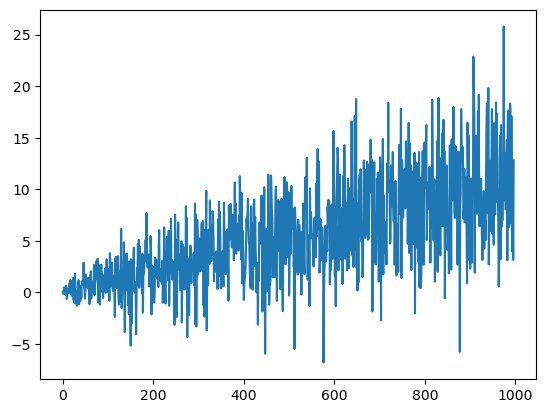

5.468576846211675


In [ ]:
p1 = plt.figure()
abs_diff = []
for i in range(len(error_1_list)):
    abs_diff.append(error_1_list[i]-error_2_list[i])
plt.plot(abs_diff)
plt.show()
print(sum(abs_diff)/len(abs_diff))

#### 求出在对误差绝对值求和时，j-s估计对极大似然估计的优势

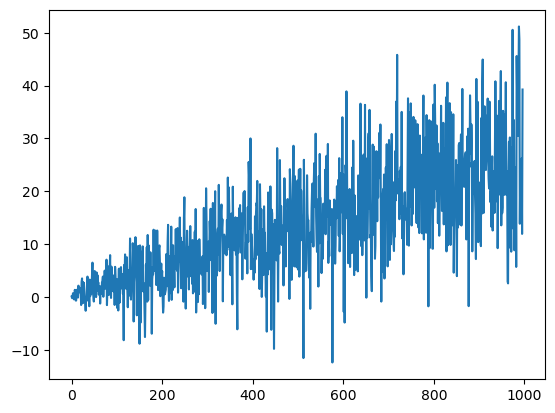

13.503063871997547


In [ ]:
p2 = plt.figure()
squre_diff = []
for i in range(len(error_3_list)):
    squre_diff.append(error_3_list[i]-error_4_list[i])
plt.plot(squre_diff)
plt.show()
print(sum(squre_diff)/len(squre_diff))

#### 求出在对误差绝对值求平方和时，j-s估计对极大似然估计的优势

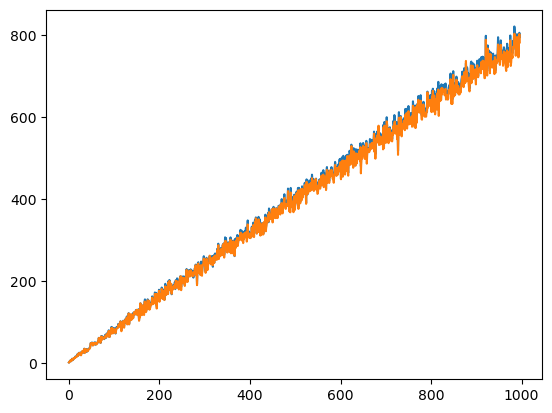

In [47]:
p3 = plt.figure()  # 画出两种估计分别对应的绝对值误差和
plt.plot(error_1_list)
plt.plot(error_2_list)
plt.show()

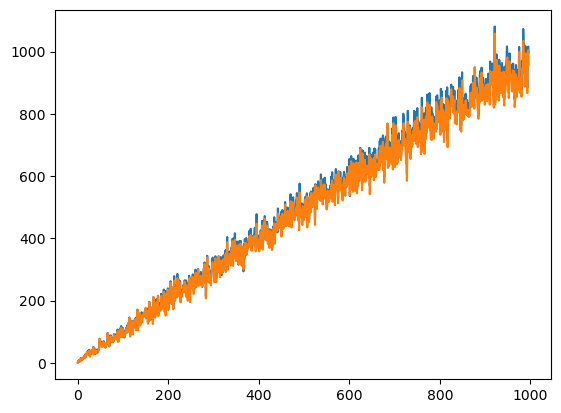

In [48]:
p4 = plt.figure()  # 画出两种估计分别对应的平方误差和
plt.plot(error_3_list)
plt.plot(error_4_list)
plt.show()

####   测试不同的待估计平均值，对j-s估计的优势影响

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
abs_bymu_list = []
squre_bymu_list = []
for mu in tqdm(range(0,800,10)):
    sigma = 1  # 标准差
    error_1_list = []
    error_2_list = []
    error_3_list = []
    error_4_list = []
    for dim in range(3,1000):
        dimm_10000 = np.random.normal(mu, sigma, dim)
        summ_of_squre = 0
        for nummm in dimm_10000:
            summ_of_squre += nummm**2
        factor = 1 - ((dim-2)/summ_of_squre)

        error_1 = 0
        for numm in dimm_10000:
            error_1 += abs(numm-mu)
        error_1_list.append(error_1)

        error_2 = 0
        for numm in dimm_10000:
            numm *= factor
            error_2 += abs(numm-mu)
        error_2
        error_2_list.append(error_2)

        error_3 = 0
        for numm in dimm_10000:
            error_3 += (numm-mu)**2
        error_3
        error_3_list.append(error_3)

        error_4 = 0
        for numm in dimm_10000:
            numm *= factor
            error_4 += (numm-mu)**2
        error_4
        error_4_list.append(error_4)

    abs_diff = []
    for i in range(len(error_1_list)):
        abs_diff.append(error_1_list[i]-error_2_list[i])
    abs_bymu_list.append(sum(abs_diff)/len(abs_diff))

    squre_diff = []
    for i in range(len(error_3_list)):
        squre_diff.append(error_3_list[i]-error_4_list[i])
    squre_bymu_list.append(sum(squre_diff)/len(squre_diff))       

100%|██████████| 80/80 [01:05<00:00,  1.23it/s]


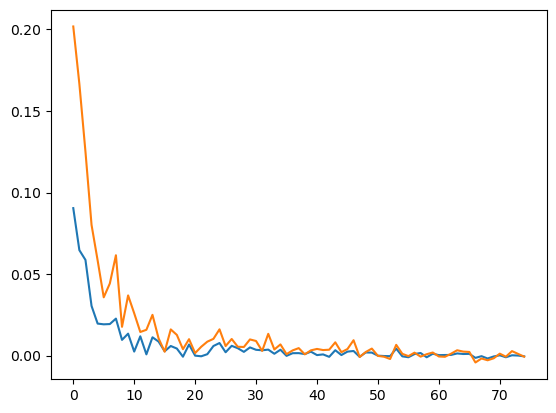

In [50]:
p5 = plt.figure()   # 
plt.plot(abs_bymu_list[5:])
plt.plot(squre_bymu_list[5:])
plt.show()

#### 均方误差和误差绝对值两方面都可以看出，均值越大，j-s估计的优势越小

#### 用模型预测，寻找最佳估计是否能超越j-s估计，假设（dim = cs_dim， mu在(-cs_mumax,cs_mumax)范围内 ）

In [ ]:
# 求极大似然的MSE误差基线
cs_dim = 10
cs_mumax = 40
import torch
import torch.nn as nn
import numpy as np
loss_func = nn.MSELoss()
from tqdm import tqdm
loss_jdsr = 0
count = 0
for ww in tqdm(range(5000)):
    dimmmm = np.random.uniform(-1*cs_mumax,cs_mumax,cs_dim)
    y = torch.tensor(dimmmm).float().cuda()
    x = torch.tensor([np.random.normal(i, 5) for i in dimmmm]).cuda()
    loss_jdsr += loss_func(x, y)
    count += 1
loss_jdsr/count

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:00<00:00, 7643.15it/s]


tensor(24.9362, device='cuda:0')

In [52]:
cs_dim = 100 # dim越大，js和jdsr差值也越大
cs_mumax = 10

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# 定义MLP模型，模型先预测输出一个由输入X产生的缩放因子，然后乘上X得到最终输出
learning_rate = 0.001
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(cs_dim, 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10, 5)
        self.fc4 = nn.Linear(5, 2)
        self.fc5 = nn.Linear(2, 1)

    def forward(self, x):
        x_orgin = x
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)*x_orgin

model = MLP().cuda()
loss_func = nn.MSELoss()

In [ ]:
import numpy as np
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losslist  = []
loss_js_list  = []
x_loss_list = []

for epoch in range(11000):
    dimmmm = np.random.uniform(-1*cs_mumax,cs_mumax,cs_dim)
    y = torch.tensor(dimmmm).float().cuda()
    x = torch.tensor([np.random.normal(i, 5) for i in dimmmm]).cuda()

    y_out = model(x)
    loss = loss_func(y_out, y)
    y_js  = x*(1-(cs_dim-2)/(sum([i*i for i in x])))
    loss_js = loss_func(y_js, y)
    loss_jdsr = loss_func(x, y)
    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向求梯度
    optimizer.step()
    if epoch>4000:
        losslist.append(loss)
        loss_js_list.append(loss_js)
        x_loss_list.append(loss_jdsr)
        if epoch%1000 == 0:
            print(sum(losslist)/len(losslist),end = " * * ")
            print(sum(loss_js_list)/len(loss_js_list),end = " * * ")
            print(sum(x_loss_list)/len(x_loss_list))
            

tensor(14.2510, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.0431, device='cuda:0') * * tensor(24.8598, device='cuda:0')
tensor(14.2278, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.1294, device='cuda:0') * * tensor(24.9497, device='cuda:0')
tensor(14.2809, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.1779, device='cuda:0') * * tensor(24.9979, device='cuda:0')
tensor(14.2912, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.1867, device='cuda:0') * * tensor(25.0066, device='cuda:0')
tensor(14.2931, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.1936, device='cuda:0') * * tensor(25.0134, device='cuda:0')
tensor(14.2993, device='cuda:0', grad_fn=<DivBackward0>) * * tensor(24.2134, device='cuda:0') * * tensor(25.0333, device='cuda:0')


#### 可见，模型学习到的最佳估计误差在 14.2 左右！
#### 比j-s估计的 24.2 和极大似然的 25 要优秀的多！
#### 如果正态分布的均值和方差继续增大，模型依然会优于j-s估计和极大似然估计！

In [55]:
print(sum(losslist)/len(losslist))

tensor(14.2902, device='cuda:0', grad_fn=<DivBackward0>)


In [56]:
loss_func(x,y)

tensor(27.8131, device='cuda:0')

In [57]:
loss_func(model(x),y)

tensor(14.5608, device='cuda:0', grad_fn=<MseLossBackward0>)

### 核心任务--求（n维，均值在(miu_min,miu_max)）组合下的最佳缩放因子